# PULSEY Tutorial I

In [5]:
from PULSEY import star
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib widget

## 0. Introduction:

This is a tutorial on constructing pulsating stellar surface maps and light curves with the python package PULSEY.  The framework for this package is built upon an existing package, STARRY.  For more detailed information on how the spherical harmonic maps utilized by PULSEY are constructed, please consult the STARRY docs at: https://github.com/rodluger/starry.

## I. Initializaing `star` object:

In PULSEY stellar surface maps are constructed from one or more spherical harmonic modes and attributes associated with this mode(s). The first action in PULSEY is to instantiate a `star` class object. Four parameters are required upon initialization:

- L and M Spherical Harmonic mode(s) [2-D array-like, int]
- a frequency(s) [array-like, float]
- a amplitude(s) [array-like, float]
- a phase(s) [array-like, float]

Let us establish arrays for those necessary paramaters, with arbitrary values:

In [6]:
lmArray = [[2,0]] # L-M mode L = 2 , M = 1
freq = [0.85] # units: per time unit
amp = [0.1] # relative to 
phase = [0.0] #

Default values are given to the following additional parameters, which can be otherwise set upon initialization or adjusted later.  These are:

- inclincation [float, default = 90.0]
- lMax value [int, default = maximum lmArray value]
- an oversampling parameter [int, default = 2.0]
- observed flag [boolean, default = True]

Inclination determines the observed inclination angle of the stellar source, which defaults to 90 degrees. L-Max indicates the maximum L-value of all L-M modes applied to the star.  The oversampling parameter determines the fidelity of pixelization of the stellar surface, a higher value indicates higher resolution. Observed indicates whether the values of the input amplitude array are to be directly applied or modulated to resemble observed output flux values. Let us establiosh those variables below:

In [7]:
inc = 70.0 # Observational angle in degrees
lMax = 2 # 
osParam = 2.0 
obsFlag = True

Now let's intialize our star object with all the variable values we have initialized above. We can do this by calling `star` with the associated parameters.  To view what our star looks look we can use the `star.show()` function which takes an argument of `time`, a float variable indicating at what time in the pulsation we want to view our stellar surface:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/PULSEY/PULSEY.py:173: UserWarning: WARNING: Producing unphysical amplitude values!
  warnings.warn("WARNING: Producing unphysical amplitude values!")


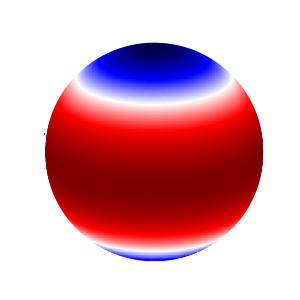

In [8]:
new_Star = star(lmArray, freq, amp, phase, inc=inc, lMax=lMax, osParam= osParam, observed = obsFlag)
new_Star.show(time = 0.0)

With our initialized star, we can now see what a static snapshot of a pulsation looks like.  However, we can also visualize puslation over an array of timestamps with the `star.visualizeStar()` function call providing an array of times as the argument

In [9]:
timeArray = np.arange(0,10,0.1)
new_Star.visualizeStar(timeArray)

100%|██████████| 100/100 [00:00<00:00, 172.05it/s]


With an initialized star object, we can now calculate the emergent flux from its pulsating surface.  This is done using the `computeFlux()` function with the given paramater of `time`: an array-like object indicating a timeframe over which to compute flux values.

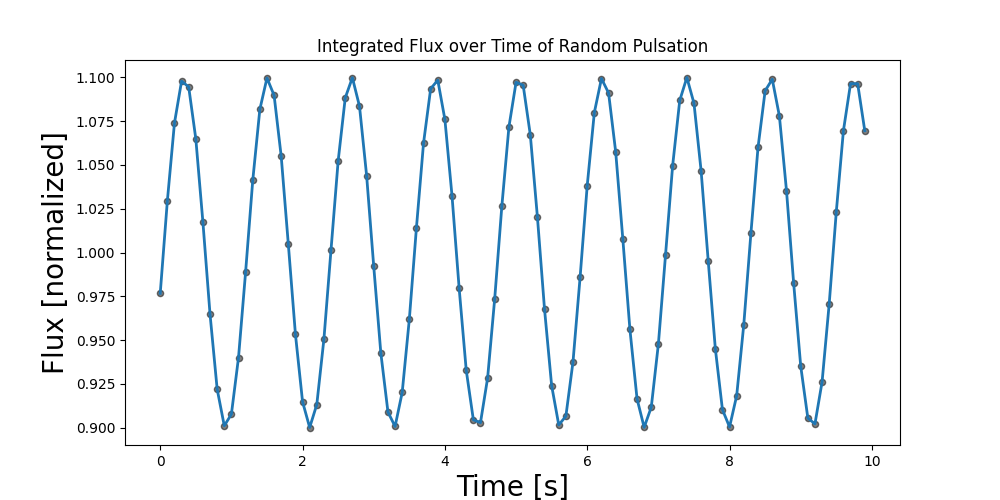

In [10]:
flux = new_Star.computeFlux(timeArray)
star.plot(timeArray, flux)

Congratulations! You have now successfully simulated a pulsating star and its resultant observational photometric data